# Day76-Optimizer_example

In [45]:
import keras
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np

In [2]:
model = Sequential()
model.add(Dense(500,input_shape = (784,)))
model.add(Activation('relu'))
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_2 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_3 (Activation)    (None, 500)               0         
_________________________________________________________________
dens

In [10]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [28]:
from keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1,784)
x_test = x_test.reshape(-1,784)

x_train = x_train/255.0
x_test = x_test/255.0

y_train_onehot = to_categorical(y_train,10)
y_test_onehot = to_categorical(y_test,10)

In [29]:
print(x_train.shape)
print(y_train_onehot.shape)
print(x_test.shape)
print(y_test_onehot.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [13]:
import tensorflow as tf

gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction = 0.333)
sess = tf.Session(config = tf.ConfigProto(gpu_options = gpu_options))

history = model.fit(x_train,y_train_onehot,batch_size = 128, epochs = 10,shuffle = True, verbose = 2, validation_split = 0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
 - 10s - loss: 0.0626 - acc: 0.9792 - val_loss: 0.0280 - val_acc: 0.9905
Epoch 2/10
 - 9s - loss: 0.0191 - acc: 0.9935 - val_loss: 0.0235 - val_acc: 0.9927
Epoch 3/10
 - 9s - loss: 0.0135 - acc: 0.9954 - val_loss: 0.0206 - val_acc: 0.9936
Epoch 4/10
 - 9s - loss: 0.0097 - acc: 0.9969 - val_loss: 0.0205 - val_acc: 0.9944
Epoch 5/10
 - 9s - loss: 0.0082 - acc: 0.9974 - val_loss: 0.0181 - val_acc: 0.9945
Epoch 6/10
 - 9s - loss: 0.0061 - acc: 0.9980 - val_loss: 0.0204 - val_acc: 0.9943
Epoch 7/10
 - 9s - loss: 0.0057 - acc: 0.9981 - val_loss: 0.0187 - val_acc: 0.9952
Epoch 8/10
 - 10s - loss: 0.0050 - acc: 0.9983 - val_loss: 0.0197 - val_acc: 0.9948
Epoch 9/10
 - 9s - loss: 0.0051 - acc: 0.9983 - val_loss: 0.0175 - val_acc: 0.9950
Epoch 10/10
 - 9s - loss: 0.0042 - acc: 0.9986 - val_loss: 0.0209 - val_acc: 0.9949


In [15]:
print( "test_set")
scores = model.evaluate(x_test,y_test_onehot, batch_size = 200, verbose = 0)
print(f'The test score is {scores}')
result = model.predict(x_test, batch_size = 200, verbose = 0)

result_max = np.argmax(result, axis = 1)
test_max = np.argmax(y_test_onehot, axis = 1)

result_bool = np.equal(result_max, test_max)
true_num = np.sum(result_bool)

print(f'The accuracy of the model {true_num/len(result_bool)}')

test_set
The test score is [0.016899831856680977, 0.995660001039505]
The accuracy of the model 0.9782


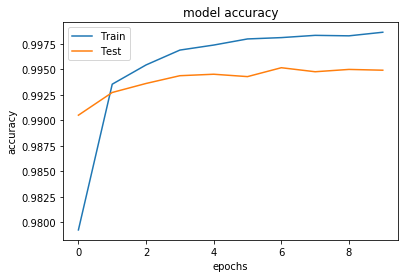

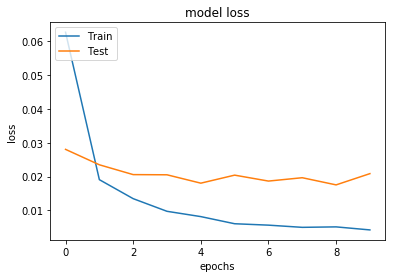

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['Train','Test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Test'], loc = 'upper left')
plt.show()

# Day76-Optimizers_進階

In [1]:
import sys
print(sys.version)

3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


In [2]:
!pip install autograd
!pip install mpl_toolkits
!pip install collections
!pip install itertools
!pip install IPython

  Stored in directory: /Users/xiejialun/Library/Caches/pip/wheels/72/6f/c2/40f130cca2c91f31d354bf72de282922479c09ce0b7853c4c5
Successfully built autograd
  Could not find a version that satisfies the requirement mpl_toolkits (from versions: )
No matching distribution found for mpl_toolkits
  Could not find a version that satisfies the requirement collections (from versions: )
No matching distribution found for collections
  Could not find a version that satisfies the requirement itertools (from versions: )
No matching distribution found for itertools


In [5]:
import matplotlib.pyplot as plt
import autograd.numpy as anp
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML

from autograd import elementwise_grad, value_and_grad, grad
from scipy.optimize import minimize
from collections import defaultdict
from itertools import zip_longest

# Objective function : the Beale function

In [8]:
#The beale function is one of the most often testing function for optimization algorithm.

f = lambda x, y : (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

xmin, xmax, xstep = -4.5, 4.5, 0.2
ymin, ymax, ystep = -4.5,4.5,0.2

x,y = np.meshgrid(np.arange(xmin, xmax+xstep, xstep) , np.arange(ymin, ymax+ystep,ystep))
z = f(x,y)

#the global minima of objective function
minima = np.array([3.0,0.5])
f(minima[0],minima[1])

0.0

In [9]:
def target_func(weights):
    x,y = weights
    return f(x,y)

# Adam Optimizer

In [13]:
class Adam:
    def __init__(self, loss, weights, lr = 0.001, beta1 = 0.9, beta2 = 0.999, epislon = 1e-8):
        #loss function
        self.loss = loss
        self.theta = weights
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        #epislon is for avoiding divide to 0
        self.epislon = epislon
        #get the gradient from the target function with input parameters
        self.get_gradient = grad(loss)
        self.m = 0
        self.v = 0
        #iteration times
        self.t = 0
        
    #avoid the bias of setting m & v to 0 at first, this member will iterate with adjusting m & v to m_hat & v_hat
    def minimize_raw(self):
        #one more iteration 
        self.t += 1
        #get gradient with current weights
        g = self.get_gradient(self.theta)
        self.m = self.beta1 * self.m + ( 1 - self.beta1 ) * g
        self.v = self.beta2 * self.v + ( 1 - self.beta2 ) * g * g
        self.m_hat = self.m / ( 1 - self.beta1**self.t )
        self.v_hat = self.v / ( 1 - self.beta2**self.t)
        
        self.theta = self.theta - self.lr * self.m_hat / (self.v_hat**0.5 + self.epislon)
    
    #Same as above, just take the step of m_hat & v_hat calculation out to update the learning rate first
    def minimize(self):
        self.t += 1
        g = self.get_gradient(self.theta)
        lr = self.lr * (1 - self.beta2 ** self.t) ** 0.5 / (1 - self.beta1 ** self.t)
        self.m = self.beta1 * self.m + ( 1 - self.beta1 ) * g
        self.v = self.beta2 * self.v + ( 1 - self.beta2 ) * g * g
        self.theta = self.theta - self.lr * self.m / (self.v ** 0.5 + self.epislon)
    
    def minimize_trace(self, path = []):
        self.t += 1
        g = self.get_gradient(self.theta)
        lr = self.lr * (1 - self.beta2 ** self.t) ** 0.5 / (1 - self.beta1 ** self.t)
        self.m = self.beta1 * self.m + ( 1 - self.beta1 ) * g
        self.v = self.beta2 * self.v + ( 1 - self.beta2 ) * g * g
        self.theta = self.theta - self.lr * self.m / (self.v ** 0.5 + self.epislon)
        path.append(np.copy(self.theta))

In [15]:
epochs = 3000
show_steps = 100
precision = 1e-8
#initial weights
weights = np.array([1.0, 1.5])
path_trace = [np.copy(weights)]
adam = Adam(target_func, weights, lr = 0.01)
print(f' start to opimize epochs : {epochs} ')
progress_step = epochs // show_steps

for i in range(epochs):
    if i % progress_step == 0:
        #get the current loss (which is put the parameters in objective function and see the output value)
        loss_val = adam.loss(adam.theta)
        print(f' times : {i}, weights : {adam.theta}, loss : {loss_val}')
        if loss_val < precision:
            print(f' loss : {loss_val} is than precision : {precision}, finish ')
            break
    adam.minimize_trace(path_trace)
print(f'\n final weights : {adam.theta}, loss {adam.loss(adam.theta)}')

 start to opimize epochs : 3000 
 times : 0, weights : [1.  1.5], loss : 41.25
 times : 30, weights : [0.49948071 0.45548872], loss : 9.666623647399408
 times : 60, weights : [1.38438415 0.17799783], loss : 2.5167779393250047
 times : 90, weights : [1.90538728 0.08816911], loss : 0.7052644281258895
 times : 120, weights : [2.10828568 0.12429845], loss : 0.42144492938445854
 times : 150, weights : [2.20781566 0.18645357], loss : 0.2880458984536982
 times : 180, weights : [2.28513102 0.23614238], loss : 0.20566609831435517
 times : 210, weights : [2.35268769 0.27225844], loss : 0.15241552107636225
 times : 240, weights : [2.41100266 0.29996974], loss : 0.11627178813676084
 times : 270, weights : [2.46129219 0.32229646], loss : 0.09077127786171788
 times : 300, weights : [2.50512668 0.34073428], loss : 0.0721910831079442
 times : 330, weights : [2.54374583 0.35623861], loss : 0.05828490579281233
 times : 360, weights : [2.57807656 0.36948437], loss : 0.04764167941860027
 times : 390, weig

# 作業:
(1)以, Adam, 為例, 調整 batch_size, epoch , 觀察accurancy, loss 的變化

(2)以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

In [26]:
def build_model(opt):
    model = Sequential()
    model.add(Dense(500, input_shape=(784,)))
    model.add(Activation('relu'))
    model.add(Dense(500))
    model.add(Activation('relu'))
    model.add(Dense(500))
    model.add(Activation('relu'))
    model.add(Dense(500))
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    return model

In [46]:
sgd = optimizers.SGD(lr = 0.01, momentum = 0.95, decay = 5e-5, nesterov = False)
rmsprop = optimizers.RMSprop(lr = 0.1, rho = 0.95)
adam = optimizers.adam(lr = 0.1, beta_1 = 0.95, beta_2 = 0.999)

opts = [sgd, rmsprop, adam]
_optimizers = ['SGD', 'RMSprop', 'Adam']

In [27]:
batch_size = [32,64,128]
epochs = [1,5,10]

In [30]:
from keras.utils import to_categorical
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1,784)
x_test = x_test.reshape(-1,784)

x_train = x_train/255.0
x_test = x_test/255.0

y_train_onehot = to_categorical(y_train,10)
y_test_onehot = to_categorical(y_test,10)

In [33]:
for b in batch_size:
    for e in epochs:
        model = build_model(adam)
        print(f' Adam optimizer with batch size : {b}, epochs : {e}')
        history = model.fit(x_train, y_train_onehot, batch_size = b, epochs = e, validation_split = 0.2, verbose = 0, shuffle = True)
        loss, acc = model.evaluate(x_test,y_test_onehot, batch_size = 128, verbose = 0)
        print(f'-----validation loss : {loss},validation accuracy : {acc}--------')
        

 Adam optimizer with batch size : 32, epochs : 1
-----validation loss : 0.06474949359297752,validation accuracy : 0.9783299934387207--------
 Adam optimizer with batch size : 32, epochs : 5
-----validation loss : 2.8937783004760744,validation accuracy : 0.8194801155090332--------
 Adam optimizer with batch size : 32, epochs : 10
-----validation loss : 2.8937783004760744,validation accuracy : 0.8194801155090332--------
 Adam optimizer with batch size : 64, epochs : 1
-----validation loss : 2.8825571426391603,validation accuracy : 0.8201801162719726--------
 Adam optimizer with batch size : 64, epochs : 5
-----validation loss : 2.87518324508667,validation accuracy : 0.8206401172637939--------
 Adam optimizer with batch size : 64, epochs : 10
-----validation loss : 2.8937783004760744,validation accuracy : 0.8194801155090332--------
 Adam optimizer with batch size : 128, epochs : 1
-----validation loss : 2.87518324508667,validation accuracy : 0.8206401172637939--------
 Adam optimizer with

 Current Optimizer : SGD


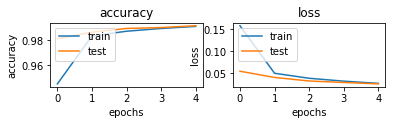

 Current Optimizer : RMSprop


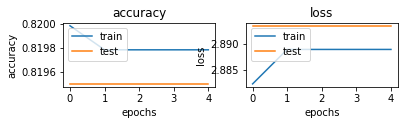

 Current Optimizer : Adam


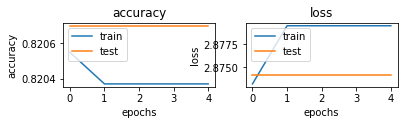

In [47]:
plot_num = 1
for opt in opts:
    model = build_model(opt)
    print(f' Current Optimizer : {_optimizers[plot_num-1]}')
    history = model.fit(x_train, y_train_onehot, batch_size = 128, epochs = 5, validation_split = 0.2, verbose = 0, shuffle = True)
    plt.subplot(3,2,plot_num*2 -1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('accuracy')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend(['train','test'], loc = 'upper left')
    
    plt.subplot(3,2,plot_num*2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend(['train','test'], loc = 'upper left')
    
    plt.show()
    plot_num += 1